Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
data_dir_train = pathlib.Path(r'C:\Users\91860\Desktop\Upgrad\CNN assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train')
data_dir_test = pathlib.Path(r'C:\Users\91860\Desktop\Upgrad\CNN assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# Listing out all the classes of skin cancer and storing them in a list. 
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Creating a code to visualize one instance of all the nine classes present in the dataset

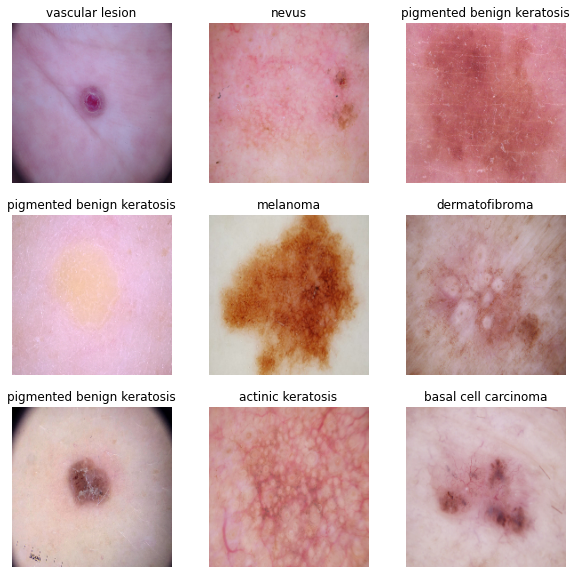

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for image_batch, label_batch in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Creating the model

In [11]:
num_classes = np.size(class_names)
model = Sequential([
layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
layers.Conv2D(16, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(32, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(num_classes)])

### Compiling the model

In [13]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

### Training the model

In [15]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 86s 2s/step - loss: 1.9944 - accuracy: 0.2545 - val_loss: 1.7868 - val_accuracy: 0.3221
Epoch 2/20
56/56 [==============================] - 65s 1s/step - loss: 1.7033 - accuracy: 0.3917 - val_loss: 1.5668 - val_accuracy: 0.4765
Epoch 3/20
56/56 [==============================] - 67s 1s/step - loss: 1.4977 - accuracy: 0.4849 - val_loss: 1.4742 - val_accuracy: 0.4944
Epoch 4/20
56/56 [==============================] - 64s 1s/step - loss: 1.3771 - accuracy: 0.5073 - val_loss: 1.4404 - val_accuracy: 0.5056
Epoch 5/20
56/56 [==============================] - 65s 1s/step - loss: 1.2605 - accuracy: 0.5480 - val_loss: 1.3702 - val_accuracy: 0.5324
Epoch 6/20
56/56 [==============================] - 66s 1s/step - loss: 1.1638 - accuracy: 0.5854 - val_loss: 1.3564 - val_accuracy: 0.5078
Epoch 7/20
56/56 [==============================] - 71s 1s/step - loss: 1.0885 - accuracy: 0.6127 - val_loss: 1.4364 - val_accuracy: 0.5235
Epoch 8/20
56/56 [==

### Visualizing training results

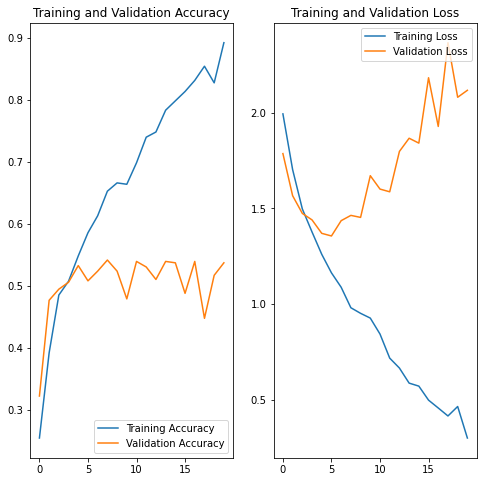

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### From the above graphs on the accuracy and loss of the model on training and validation sets, we can see that after a point, the validation accuracy decreases while the training accuracy increases and that the validation loss shoots up while the training loss drastically decreases. This is clear evidence of overfitting.

In [17]:
data_augmentation = keras.Sequential(
  [layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.5),])

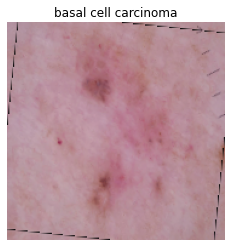

In [18]:
# visualizing how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(4, 4))
for image_batch, label_batch in train_ds.take(1):
    augmented_images = data_augmentation(image_batch)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

### Creating the model, compiling and training the model


In [19]:
model = Sequential([data_augmentation,
layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
layers.Conv2D(16, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Dropout(0.2),
layers.Conv2D(32, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Dropout(0.2),
layers.Conv2D(64, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Dropout(0.2),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(num_classes)])

### Compiling the model

In [20]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

### Training the model

In [21]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 45s 809ms/step - loss: 2.1961 - accuracy: 0.2042 - val_loss: 2.0799 - val_accuracy: 0.1812
Epoch 2/20
56/56 [==============================] - 45s 811ms/step - loss: 1.9969 - accuracy: 0.2333 - val_loss: 2.0135 - val_accuracy: 0.2864
Epoch 3/20
56/56 [==============================] - 48s 861ms/step - loss: 1.7648 - accuracy: 0.3599 - val_loss: 1.7444 - val_accuracy: 0.3691
Epoch 4/20
56/56 [==============================] - 46s 829ms/step - loss: 1.6582 - accuracy: 0.4051 - val_loss: 1.7093 - val_accuracy: 0.3691
Epoch 5/20
56/56 [==============================] - 46s 822ms/step - loss: 1.5793 - accuracy: 0.4258 - val_loss: 1.5837 - val_accuracy: 0.4139
Epoch 6/20
56/56 [==============================] - 46s 823ms/step - loss: 1.5102 - accuracy: 0.4604 - val_loss: 1.5718 - val_accuracy: 0.4765
Epoch 7/20
56/56 [==============================] - 46s 820ms/step - loss: 1.4323 - accuracy: 0.5033 - val_loss: 1.5622 - val_accuracy: 0.4430

### Visualizing the results

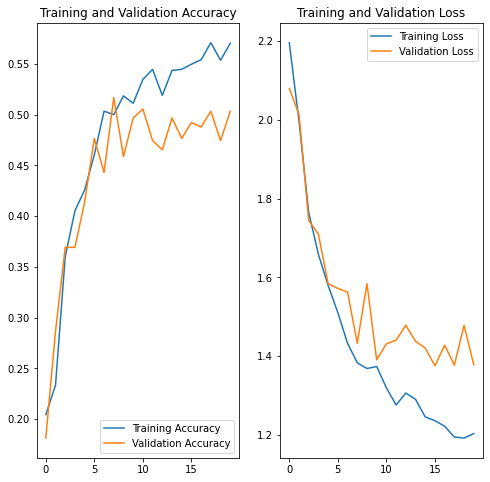

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### From the above graphs on the accuracy and loss of the model on training and validation sets, we can see that the accuracy of the model for both the training set and the validation set is low, though there is not much difference between them. Also the loss difference between them is not much. From this it is clear that the model is underfitting. As compared to the previous model, though this model has a marginally lower validation accuracy, the validation loss is much smaller . Hence it seems to be a better model.

In [23]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train,'*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train,'*','*.jpg'))]
dataframe_dict = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])
original_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

#### - The class seborrheic keratosis has the least no of samples. Only 77 samples.
#### - In terms of the no of samples, the pigmented benign keratosis class dominates the dataset. It contains 462 samples.


In [24]:
!pip install Augmentor

You should consider upgrading via the 'c:\users\91860\anaconda3\python.exe -m pip install --upgrade pip' command.


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [25]:
path_to_training_dataset="C:\\Users\\91860\Desktop\\Upgrad\\CNN assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to C:\Users\91860\Desktop\Upgrad\CNN assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x24C02F30670>: 100%|██████████| 500/500 [00:17<00:00, 28.57 Samples/s]                  
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to C:\Users\91860\Desktop\Upgrad\CNN assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x24C02D96190>: 100%|██████████| 500/500 [00:15<00:00, 32.36 Samples/s]                  
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to C:\Users\91860\Desktop\Upgrad\CNN assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x24C02EEE8E0>: 100%|██████████| 500/500 [00:14<00:00, 33.63 Samples/s]                  
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to C:\Users\91860\Desktop\Upgrad\CNN assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1936x1296 at 0x24C02CD4BE0>: 100%|██████████| 500/500 [00:56<00:00,  8.79 Samples/s]                  
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=962x641 at 0x24C02F06AF0>:   0%|          | 1/500 [00:00<01:23,  5.96 Samples/s]

Initialised with 357 image(s) found.
Output directory set to C:\Users\91860\Desktop\Upgrad\CNN assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=576x768 at 0x24C02D68D90>: 100%|██████████| 500/500 [00:50<00:00,  9.87 Samples/s]                    
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to C:\Users\91860\Desktop\Upgrad\CNN assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x24C02EBE2E0>: 100%|██████████| 500/500 [00:15<00:00, 33.00 Samples/s]                  
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to C:\Users\91860\Desktop\Upgrad\CNN assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x24C02CD4490>: 100%|██████████| 500/500 [00:27<00:00, 18.01 Samples/s]                  
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to C:\Users\91860\Desktop\Upgrad\CNN assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x24C02D7E0D0>: 100%|██████████| 500/500 [00:15<00:00, 32.36 Samples/s]                  
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to C:\Users\91860\Desktop\Upgrad\CNN assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x24C02F1D460>: 100%|██████████| 500/500 [00:14<00:00, 33.87 Samples/s]                  


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [26]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [27]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['C:\\Users\\91860\\Desktop\\Upgrad\\CNN assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_03a2e068-868e-491f-b938-10ed0a3aa172.jpg',
 'C:\\Users\\91860\\Desktop\\Upgrad\\CNN assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_13a6612d-5aa8-4908-a1b1-b464f605737e.jpg',
 'C:\\Users\\91860\\Desktop\\Upgrad\\CNN assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_6cc969f6-e107-4267-9a1e-fcddc893be20.jpg',
 'C:\\Users\\91860\\Desktop\\Upgrad\\CNN assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_7ccf0259-7dab-4c66-8830-dc7f41a56bfd.jpg',
 'C:\\Users\\91860\\Desktop\\Upgrad\\CNN assignment\

In [28]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [29]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [30]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [31]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

In [32]:
batch_size = 32
img_height = 180
img_width = 180

In [33]:
data_dir_train=pathlib.Path(r'C:\Users\91860\Desktop\Upgrad\CNN assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train')
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [34]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [35]:
model = Sequential([
layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
layers.Conv2D(16, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Dropout(0.2),
layers.Conv2D(32, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Dropout(0.2),
layers.Conv2D(64, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Dropout(0.2),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(num_classes)])

In [36]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

In [ ]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 246s 1s/step - loss: 2.2199 - accuracy: 0.1945 - val_loss: 1.9046 - val_accuracy: 0.2301
Epoch 2/30
169/169 [==============================] - 161s 950ms/step - loss: 1.6908 - accuracy: 0.3542 - val_loss: 1.5767 - val_accuracy: 0.4120
Epoch 3/30
169/169 [==============================] - 159s 944ms/step - loss: 1.4900 - accuracy: 0.4264 - val_loss: 1.5496 - val_accuracy: 0.3987
Epoch 4/30
169/169 [==============================] - 159s 939ms/step - loss: 1.3480 - accuracy: 0.4905 - val_loss: 1.3568 - val_accuracy: 0.5011
Epoch 5/30
169/169 [==============================] - 162s 956ms/step - loss: 1.2372 - accuracy: 0.5330 - val_loss: 1.4493 - val_accuracy: 0.4402
Epoch 6/30
169/169 [==============================] - 159s 938ms/step - loss: 1.1479 - accuracy: 0.5610 - val_loss: 1.2387 - val_accuracy: 0.5494
Epoch 7/30
169/169 [==============================] - 159s 938ms/step - loss: 1.0589 - accuracy: 0.6052 - val_loss: 1.1332 - va

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()